In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RESULTS = "/mnt/biocluster/praktikum/genprakt/kayser/Solution1/runs/"

In [3]:
RESULTS = "/Users/simon/IdeaProjects/gobi/data/exonskipping/outs"

In [ ]:
'''The report should contain
at least two cumulative plots (see definition on the internet or an R tutorial) showing the
1Guideline: a bunch of plots without a clear explanation of what is shown, without description of what
can be observed, or without a statement what can be concluded is not a sufficient report and will be graded
accordingly.
3
distributions of the maximum number of skipped exons and skipped bases, respectively,
per ES-SE for every GTF file. The plots have to be saved also into your output directory
named skipped_exons.jpg and skipped_bases.jpg. '''

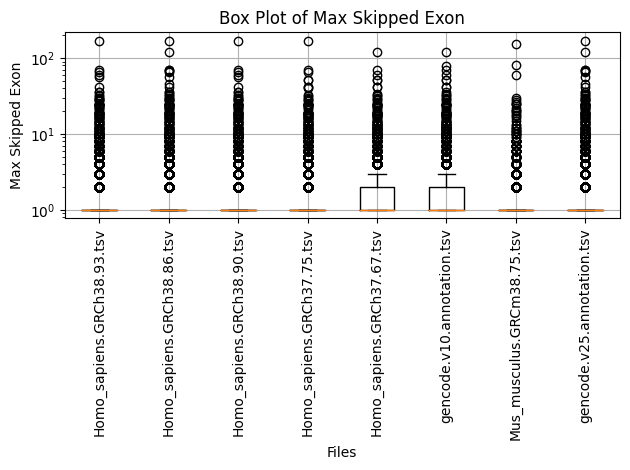

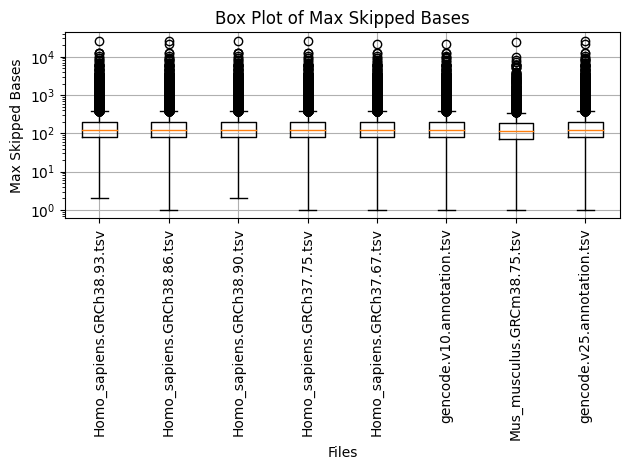

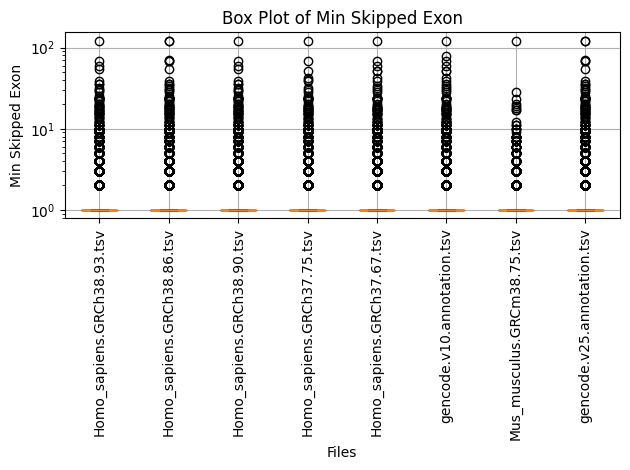

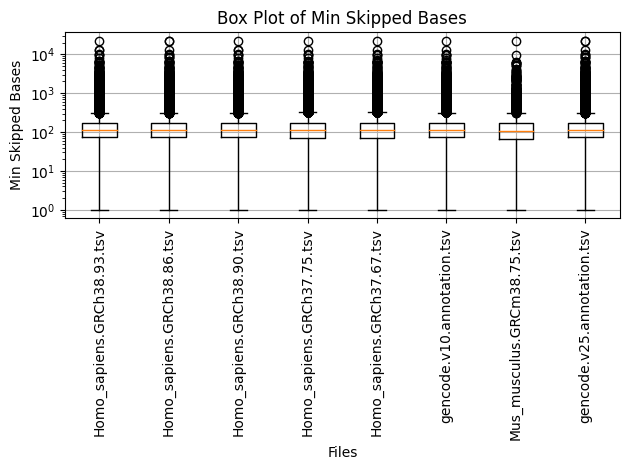

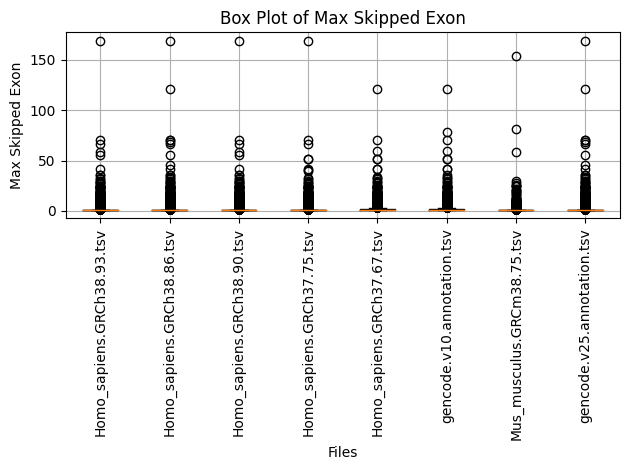

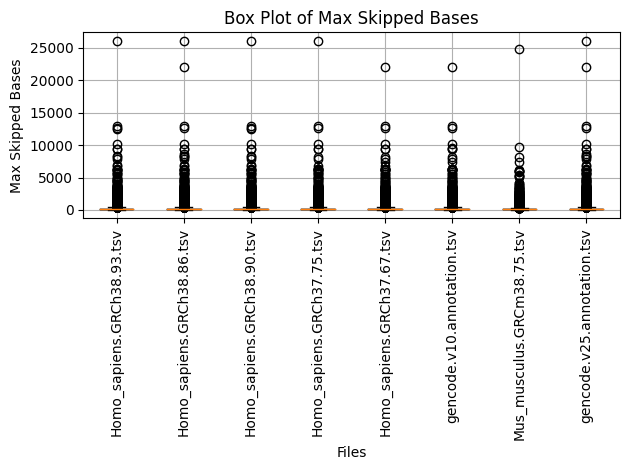

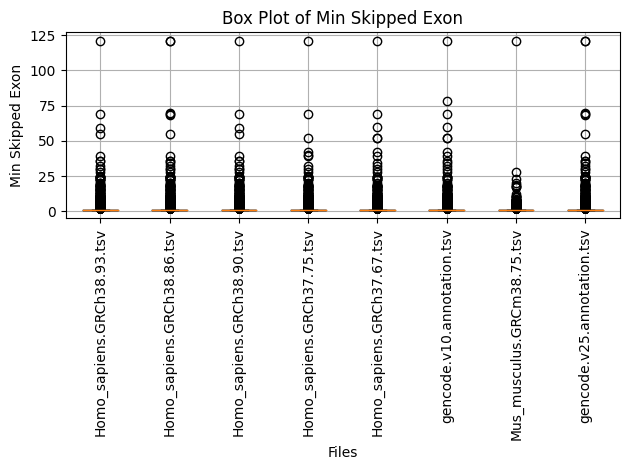

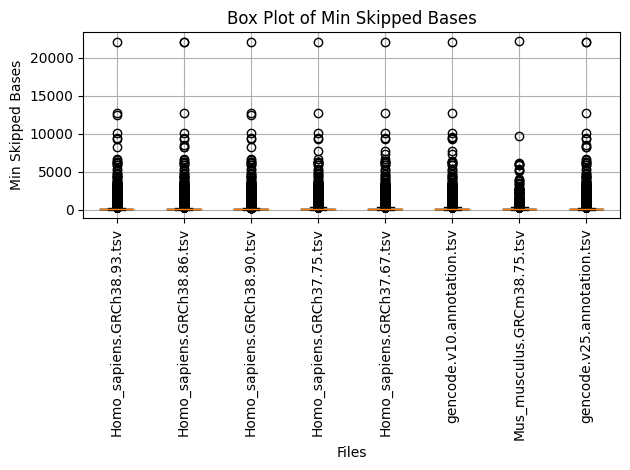

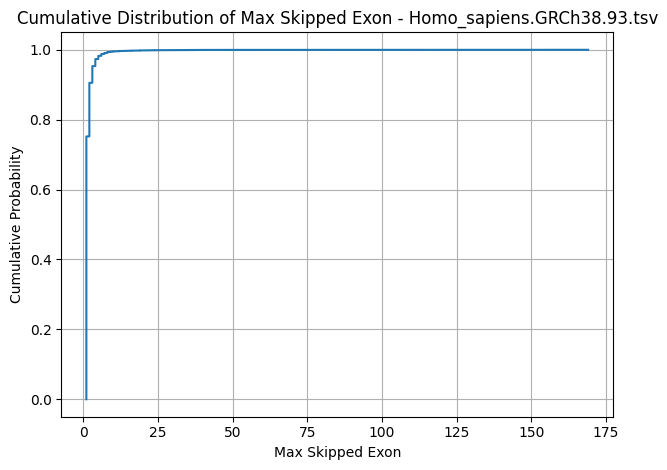

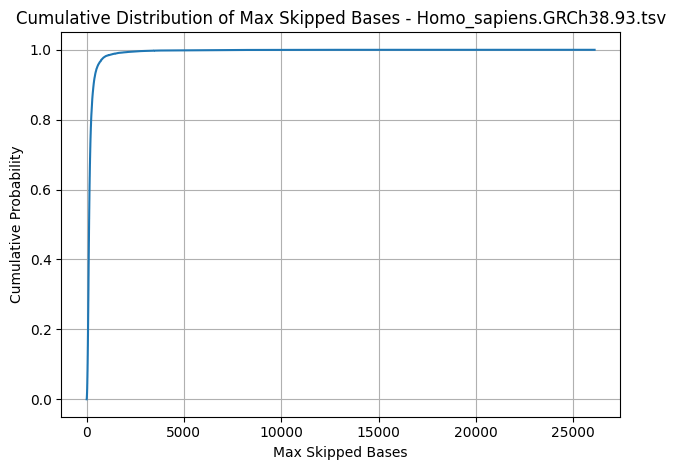

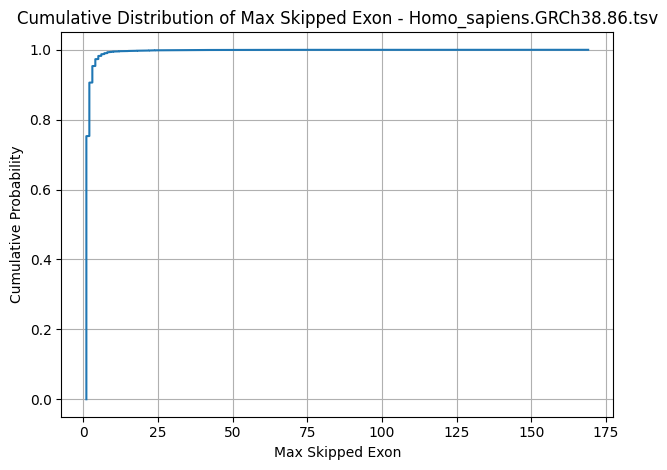

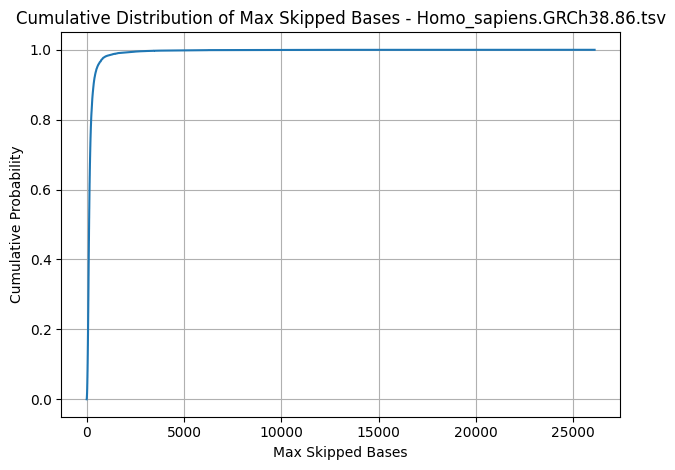

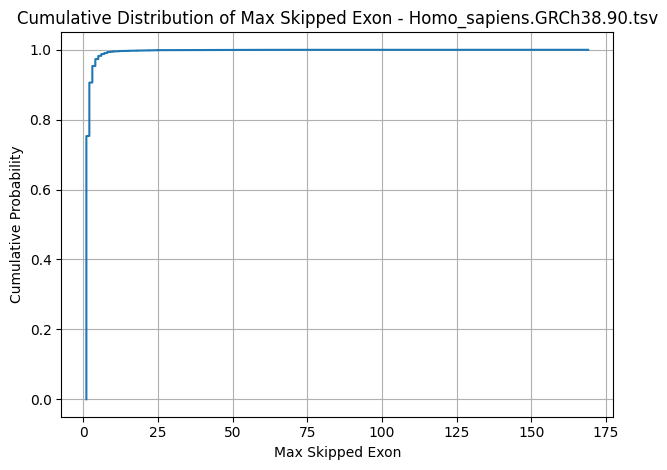

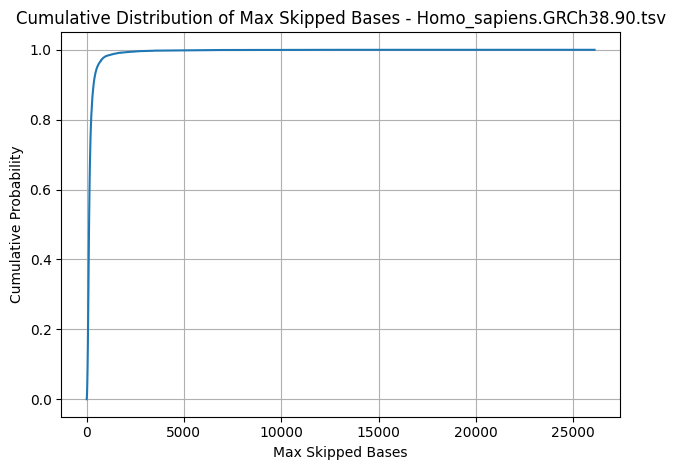

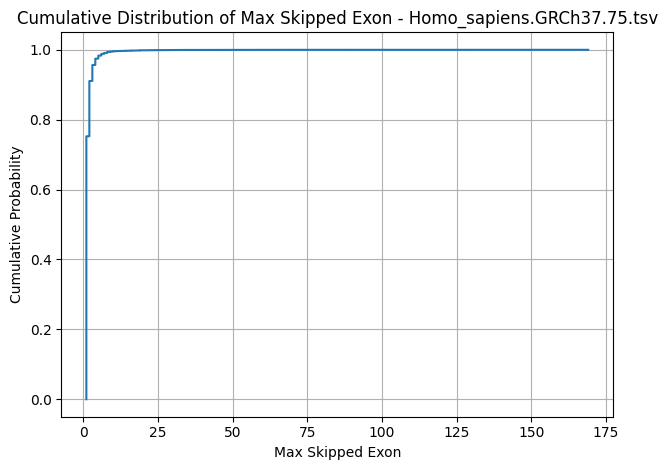

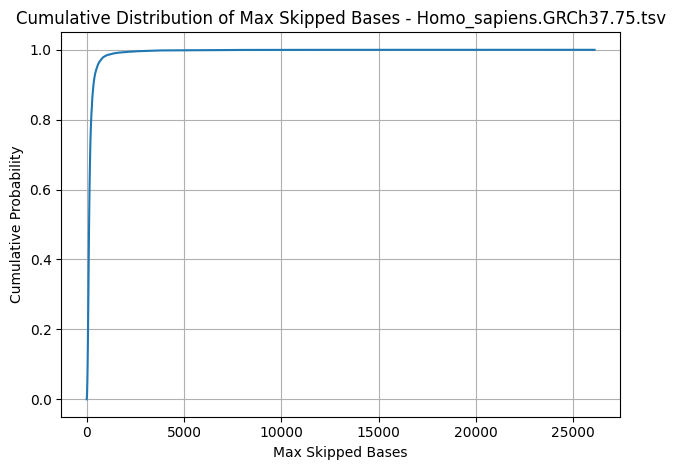

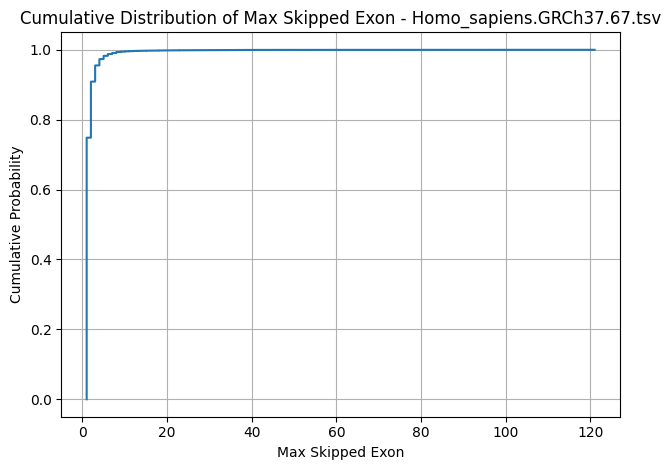

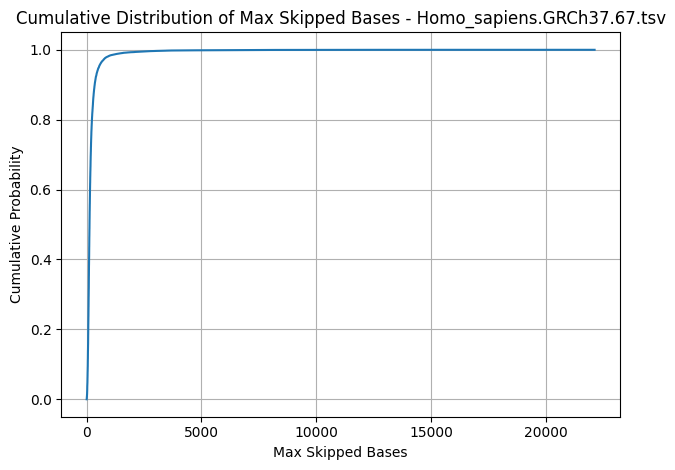

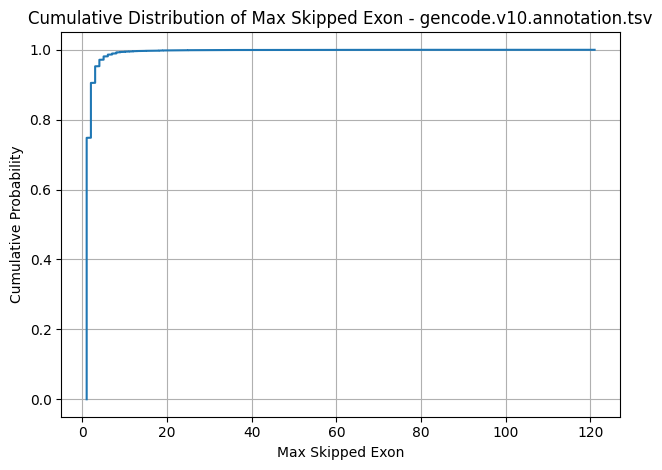

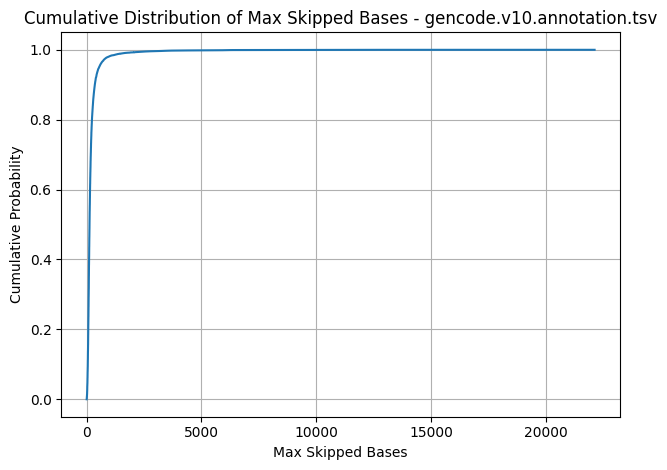

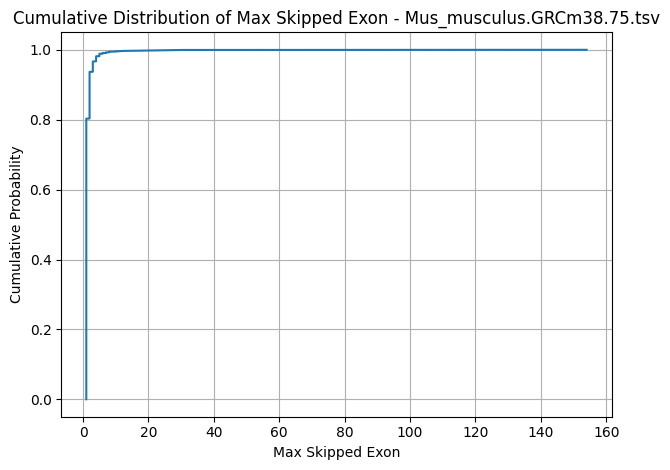

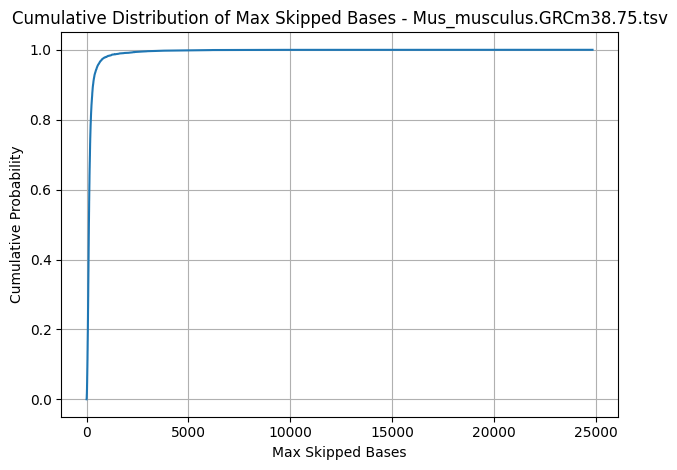

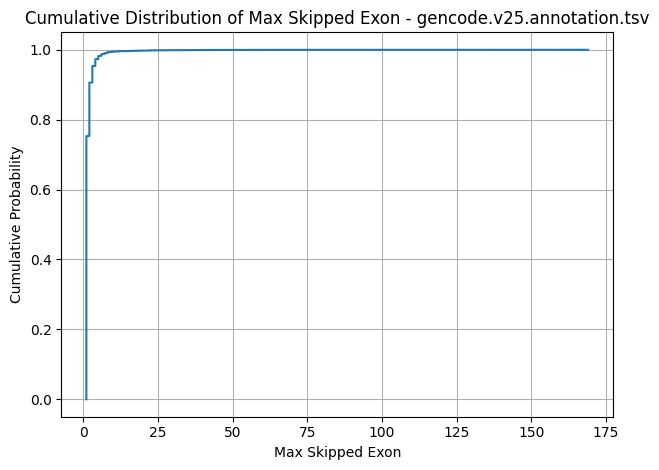

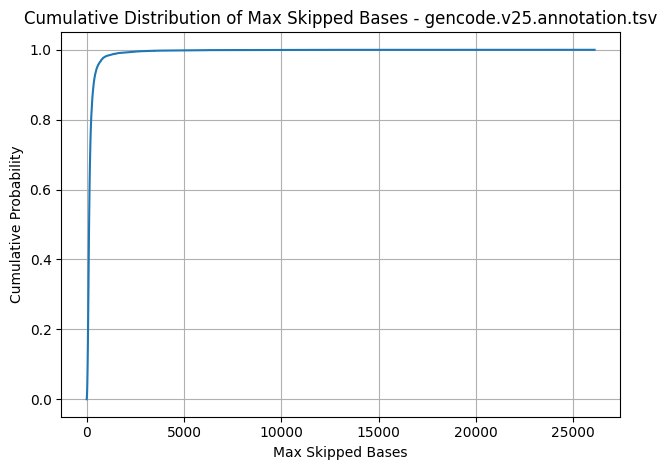

In [5]:
# List to store the file names
tsv_data = {}

# Iterate over all files in the directory
for file_name in os.listdir(RESULTS):
    # only if .tsv
    if (file_name.endswith(".tsv") and
            not file_name.endswith("-analysis.tsv") and
            not file_name.endswith(".gtf") and
            not file_name.startswith("Saccharomyces")): # No alternative splicing here
        data = pd.read_csv(os.path.join(RESULTS,file_name), sep="\t")
        tsv_data[file_name] = data

# Create the figures
# Initialize dictionaries to store data for box plots
data_dict = {
    'max_skipped_exon': [],
    'max_skipped_bases': [],
    'min_skipped_exon': [],
    'min_skipped_bases': []
}

# Extract the values from the existing columns
for file_name, data in tsv_data.items():
    data_dict['max_skipped_exon'].append(data['max_skipped_exon'].values)
    data_dict['max_skipped_bases'].append(data['max_skipped_bases'].values)
    data_dict['min_skipped_exon'].append(data['min_skipped_exon'].values)
    data_dict['min_skipped_bases'].append(data['min_skipped_bases'].values)

# Create box plots
for key, values in data_dict.items():
    plt.figure()
    plt.boxplot(values, labels=tsv_data.keys())
    plt.yscale('log')
    plt.title(f'Box Plot of {key.replace("_", " ").title()}')
    plt.xlabel('Files')
    plt.ylabel(key.replace("_", " ").title())
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(RESULTS, f'boxplot_{key}.jpg'))
    plt.show()
    plt.close()
for key, values in data_dict.items():
    plt.figure()
    plt.boxplot(values, labels=tsv_data.keys())
    plt.title(f'Box Plot of {key.replace("_", " ").title()}')
    plt.xlabel('Files')
    plt.ylabel(key.replace("_", " ").title())
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(RESULTS, f'boxplot_{key}.jpg'))
    plt.show()
    plt.close()

    # Create cumulative plots for each TSV file
for file_name, data in tsv_data.items():
    # Cumulative plot for max skipped exon
    plt.figure()
    sorted_exons = np.sort(data['max_skipped_exon'].values)
    cumulative_exons = np.arange(1, len(sorted_exons) + 1) / len(sorted_exons)
    plt.plot(sorted_exons, cumulative_exons, label=file_name)

    plt.title(f'Cumulative Distribution of Max Skipped Exon - {file_name}')
    plt.xlabel('Max Skipped Exon')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Cumulative plot for max skipped bases
    plt.figure()
    sorted_bases = np.sort(data['max_skipped_bases'].values)
    cumulative_bases = np.arange(1, len(sorted_bases) + 1) / len(sorted_bases)
    plt.plot(sorted_bases, cumulative_bases, label=file_name)

    plt.title(f'Cumulative Distribution of Max Skipped Bases - {file_name}')
    plt.xlabel('Max Skipped Bases')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
